In [5]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

directory_path = "/Users/bao.vo/PycharmProjects/PythonProject/Data"

In [6]:
# Set the directory containing your CSV files
directory_path = "/Users/bao.vo/PycharmProjects/PythonProject/Data/"

csv_files = glob.glob(os.path.join(directory_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files.")

Found 16 CSV files.


In [ ]:
# for file in csv_files:
#     try:
#         print(f"\nAnalyzing file: {os.path.basename(file)}")
#
#         # Read the file with optimized memory handling
#         df = pd.read_csv(file, low_memory=False)
#
#         # Basic Information
#         print("\nBasic Info:")
#         print(df.info())
#
#         # Missing Values
#         print("\nMissing Values:")
#         print(df.isna().sum())
#
#         # Column Types
#         print("\nColumn Types:")
#         print(df.dtypes.value_counts())
#
#         # Descriptive Statistics
#         print("\nDescriptive Statistics:")
#         print(df.describe(include="all"))
#
#         # Sample Data
#         print("\nSample Data:")
#         print(df.head())
#
#     except Exception as e:
#         print(f"Failed to read {file}: {e}")

In [10]:
directory_path = "/Users/bao.vo/PycharmProjects/PythonProject/Data/"
files = os.listdir(directory_path)
print("Files in directory:")
print(files)

# Define file paths
files = {
    "milestones": "Georgia Milestones Scores.csv",
    "milestone_subscores": "Georgia Milestones Sublevel Score.csv",
    "sat_cohort": "SAT Cohort Scores.csv",
    "fact_sat": "Fact SAT Subject Scores.csv",
    "fact_sat_summary": "Fact_SATSummaryTest.csv",
    "grades_2024": "Student Teacher Grade 2024.csv",
    "grades_2025": "Student Teacher Grade 2025.csv",
    "illuminate_2024": "IlluminateData2024.csv",
    "illuminate_2025": "IlluminateData2025.csv",
    "grad_summary": "GraduationAreaSummary.csv",
    "courses": "Courses.csv"
}


Files in directory:
['Map Growth Data.csv', 'Fact SAT Subject Scores.csv', 'SAT Cohort Scores.csv', 'HS_Georgia Milestones Scores.csv', '.DS_Store', 'HS_GraduationAreaSummary.csv', 'MAP Sublevel Test data.csv', 'HS_SAT Cohort Scores.csv', 'Georgia Milestones Scores.csv', 'HS_Georgia Milestones Sublevel Score.csv', 'HS_Fact_SATSummaryTest.csv', 'Not Needed', 'Student Teacher Grade 2025.csv', 'IlluminateData2023.csv', 'IlluminateData2022.csv', 'Student Teacher Grade 2024.csv', 'Courses.csv', 'IlluminateData2025.csv', 'IlluminateData2024.csv', 'HS_Fact SAT Subject Scores.csv', 'GraduationAreaSummary.csv', 'Map Subject Test Data.csv', 'Georgia Milestones Sublevel Score.csv', 'Fact_SATSummaryTest.csv']


In [8]:

eda_files = [
    "Georgia Milestones Scores.csv",
    "Georgia Milestones Sublevel Score.csv",
    "SAT Cohort Scores.csv",
    "Fact SAT Subject Scores.csv",
    "Fact_SATSummaryTest.csv",
    "GraduationAreaSummary.csv",
    "Courses.csv"
]

for fname in eda_files:
    fpath = os.path.join(directory_path, fname)
    try:
        print(f"\n📊 EDA for: {fname}")
        df = pd.read_csv(fpath, low_memory=False)

        print("\nShape:", df.shape)
        print("\nMissing Values:\n", df.isnull().sum())
        print("\nColumn Types:\n", df.dtypes.value_counts())
        print("\nSample Data:\n", df.head())
        print("\nDescriptive Statistics (Numeric):\n", df.describe())

    except Exception as e:
        print(f"Failed to analyze {fname}: {e}")


📊 EDA for: Georgia Milestones Scores.csv

Shape: (382324, 27)

Missing Values:
 GeorgiaMilestonesId                           0
GeorgiaMilestonesAchievementLevelId           0
SubjectDesc                                   0
SchoolYearId                                  0
AssessmentAdministrationWindowId              0
AssessmentAdministrationWindowDesc            0
TestingDateId                                 0
StudentPersonKey_mask                         0
SchoolDetailFCSId                             0
SchoolId                                      0
ScaleScore                                    0
AchievementLevel                              0
GradeConversionScore                     322112
LexileScore                              176358
ReadingIndicatorMetFlag                  241654
TestGrade                                     0
NRT_NP                                   254170
ActiveFactGeorgiaMilestonesRecordFlag         0
ExtendedWritingT1Score                   243883
Extende

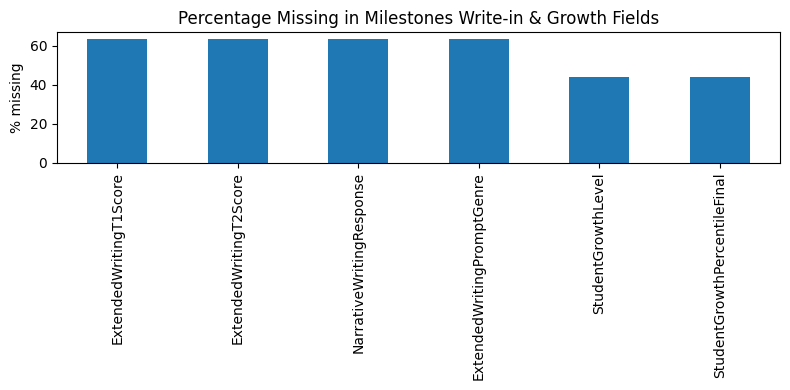

In [21]:
df = pd.read_csv("Data/Georgia Milestones Scores.csv", low_memory=False)
df = df.rename(columns={"StudentPersonKey_mask": "student_id"})
cols = [
    "ExtendedWritingT1Score", "ExtendedWritingT2Score",
    "NarrativeWritingResponse", "ExtendedWritingPromptGenre",
    "StudentGrowthPercentileFinal", "StudentGrowthLevel"
]
missing_pct = df[cols].isna().mean() * 100

plt.figure(figsize=(8,4))
missing_pct.sort_values(ascending=False).plot.bar()
plt.title("Percentage Missing in Milestones Write-in & Growth Fields")
plt.ylabel("% missing")
plt.tight_layout()
plt.show()

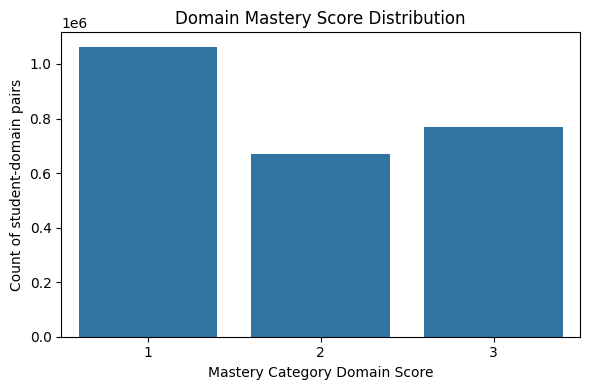

In [33]:
# histogram of the raw domain score (0–3)
plt.figure(figsize=(6,4))
sns.countplot(x="MasteryCategoryDomainScore", data=subscores_df)
plt.title("Domain Mastery Score Distribution")
plt.xlabel("Mastery Category Domain Score")
plt.ylabel("Count of student-domain pairs")
plt.tight_layout()
plt.show()

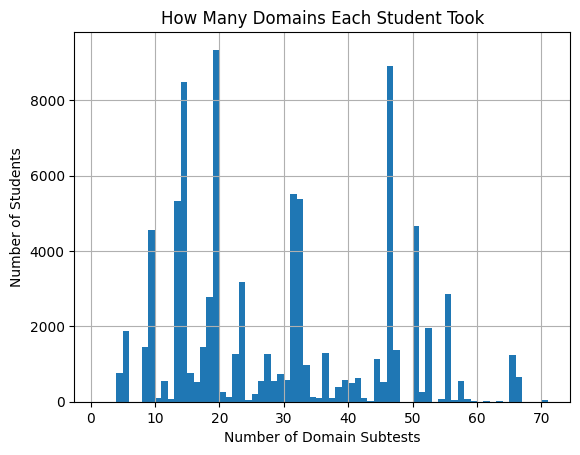

In [34]:
domain_counts = subscores_df.groupby("student_id")["AssessmentId"].nunique()
domain_counts.hist(bins=range(1, domain_counts.max()+2))
plt.title("How Many Domains Each Student Took")
plt.xlabel("Number of Domain Subtests")
plt.ylabel("Number of Students")
plt.show()

In [12]:
# Load milestones and get HS student IDs
milestones_df = pd.read_csv(os.path.join(directory_path, files["milestones"]), low_memory=False)
milestones_df = milestones_df.rename(columns={"StudentPersonKey_mask": "student_id"})

milestones_keep = [
    "student_id", "SubjectDesc", "ScaleScore", "AchievementLevel", "LexileScore",
    "StudentGrowthPercentileFinal", "TestGrade", "TestingDateId"
]
milestones_df = milestones_df[milestones_keep]
milestones_df = milestones_df.sort_values("TestingDateId").drop_duplicates(
    subset=["student_id", "SubjectDesc"], keep="last"
)

# Identify high-school (grades 9–12) student IDs
hs_ids = set(
    milestones_df.loc[
        milestones_df["TestGrade"].between(9, 12),
        "student_id"
    ]
)

# Define mapping of logical keys to filenames (reuse your files dict)
file_map = {
    "milestones": files["milestones"],
    "milestone_subscores": files["milestone_subscores"],
    "sat_cohort": files["sat_cohort"],
    "fact_sat": files["fact_sat"],
    "fact_sat_summary": files["fact_sat_summary"],
    "grad_summary": files["grad_summary"],
    "grades_2024": files["grades_2024"],
    "grades_2025": files["grades_2025"],
    "illuminate_2024": files["illuminate_2024"],
    "illuminate_2025": files["illuminate_2025"]
    # courses is a static ref table; skip or export full if needed
}

for key, fname in file_map.items():
    path = os.path.join(directory_path, fname)
    try:
        df = pd.read_csv(path, low_memory=False, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(path, low_memory=False, encoding='latin1')
    # normalize student_id column
    if "StudentPersonKey_mask" in df.columns:
        df = df.rename(columns={"StudentPersonKey_mask": "student_id"})
    if "mask_studentpersonkey" in df.columns:
        df = df.rename(columns={"mask_studentpersonkey": "student_id"})
    # For grade and illuminate files, also check for lowercase or alternate key
    if "mask_studentpersonkey" in df.columns:
        df = df.rename(columns={"mask_studentpersonkey": "student_id"})
    # filter to HS students if student_id present
    if "student_id" in df.columns:
        df_hs = df[df["student_id"].isin(hs_ids)]
    else:
        df_hs = df
    # export filtered file
    out_name = f"HS_{fname}"
    out_path = os.path.join(directory_path, out_name)
    df_hs.to_csv(out_path, index=False)
    print(f"Exported {out_name} with shape {df_hs.shape}")

Exported HS_Georgia Milestones Scores.csv with shape (145058, 27)
Exported HS_Georgia Milestones Sublevel Score.csv with shape (876548, 12)
Exported HS_SAT Cohort Scores.csv with shape (8569, 61)
Exported HS_Fact SAT Subject Scores.csv with shape (58618, 8)
Exported HS_Fact_SATSummaryTest.csv with shape (29310, 12)
Exported HS_GraduationAreaSummary.csv with shape (136857, 8)
Exported HS_Student Teacher Grade 2024.csv with shape (563742, 32)
Exported HS_Student Teacher Grade 2025.csv with shape (394440, 32)
Exported HS_IlluminateData2024.csv with shape (3888422, 28)
Exported HS_IlluminateData2025.csv with shape (5013043, 28)


In [17]:
subscores_df = pd.read_csv(os.path.join(directory_path, files["milestone_subscores"]), low_memory=False)
subscores_df = subscores_df.rename(columns={"StudentPersonKey_mask": "student_id"})

subscores_keep = ["student_id", "AssessmentId", "MasteryCategoryDomainScore", "TestingDateId"]
subscores_df = subscores_df[subscores_keep]
subscores_df = subscores_df.sort_values("TestingDateId").drop_duplicates(
    subset=["student_id", "AssessmentId"], keep="last"
)

In [ ]:
sat_df = pd.read_csv(os.path.join(directory_path, files["sat_cohort"]), low_memory=False)
sat_df = sat_df.rename(columns={"mask_studentpersonkey": "student_id"})

sat_keep = [
    "student_id", "LATEST_TOTAL_SCORE", "LATEST_MATH_SECTIONSCORE",
    "LATEST_EVIDENCE_BASED_READING_AND_WRITING_SECTIONSCORE", "LATEST_ASSESSMENT_DATE",
    "MATH_CCR_BENCHMARK_INDICATOR", "EVIDENCE_BASED_READING_AND_WRITING_CCR_BENCHMARK_INDICATOR"
]
sat_df = sat_df[sat_keep]
sat_df = sat_df.sort_values("LATEST_ASSESSMENT_DATE").drop_duplicates("student_id", keep="last")

In [18]:
fact_sat_df = pd.read_csv(os.path.join(directory_path, files["fact_sat"]), low_memory=False)
fact_sat_df = fact_sat_df.rename(columns={"mask_studentpersonkey": "student_id"})

fact_sat_keep = ["student_id", "SubjectScore", "SubjectPercentile", "TestingDateId"]
fact_sat_df = fact_sat_df[fact_sat_keep]
fact_sat_df = fact_sat_df.sort_values("TestingDateId").drop_duplicates("student_id", keep="last")

In [ ]:
fact_sat_summary_df = pd.read_csv(os.path.join(directory_path, files["fact_sat_summary"]), low_memory=False)
fact_sat_summary_df = fact_sat_summary_df.rename(columns={"mask_studentpersonkey": "student_id"})

summary_keep = ["student_id", "MathScore", "VerbalScore", "TotalScore", "MathPercentile", "VerbalPercentile"]
fact_sat_summary_df = fact_sat_summary_df[summary_keep]

In [ ]:
grad_df = pd.read_csv(os.path.join(directory_path, files["grad_summary"]), low_memory=False)
grad_df = grad_df.rename(columns={"mask_studentpersonkey": "student_id"})

grad_keep = ["student_id", "SubjectArea", "AreaCredits", "AreaCreditStillNeeded"]
grad_df = grad_df[grad_keep]

In [ ]:
courses_df = pd.read_csv(os.path.join(directory_path, files["courses"]), low_memory=False)
courses_keep = ["CourseId", "coursename", "DepartmentDesc", "SubjectAreaDesc", "CourseLevelDesc"]
courses_df = courses_df[courses_keep]

In [13]:
# Load datasets
milestones_df = pd.read_csv(os.path.join(directory_path, files["milestones"]), low_memory=False)
# subscores_df = pd.read_csv(os.path.join(directory_path, files["milestone_subscores"]), low_memory=False)
sat_df = pd.read_csv(os.path.join(directory_path, files["sat_cohort"]), low_memory=False)
fact_sat_df = pd.read_csv(os.path.join(directory_path, files["fact_sat"]), low_memory=False)
fact_sat_summary_df = pd.read_csv(os.path.join(directory_path, files["fact_sat_summary"]), low_memory=False)
# grades_df = pd.concat([
#     pd.read_csv(os.path.join(directory_path, files["grades_2024"]), low_memory=False),
#     pd.read_csv(os.path.join(directory_path, files["grades_2025"]), low_memory=False)
# ], ignore_index=True)
grad_df = pd.read_csv(os.path.join(directory_path, files["grad_summary"]), low_memory=False)
courses_df = pd.read_csv(os.path.join(directory_path, files["courses"]), low_memory=False)

# Merge SAT + Milestones + Grades on student ID (mask_studentpersonkey)
# First standardize key column names if needed
# grades_df = grades_df.rename(columns={"mask_studentpersonkey": "student_id"})
milestones_df = milestones_df.rename(columns={"StudentPersonKey_mask": "student_id"})
# subscores_df = subscores_df.rename(columns={"StudentPersonKey_mask": "student_id"})
sat_df = sat_df.rename(columns={"mask_studentpersonkey": "student_id"})
fact_sat_df = fact_sat_df.rename(columns={"mask_studentpersonkey": "student_id"})
fact_sat_summary_df = fact_sat_summary_df.rename(columns={"mask_studentpersonkey": "student_id"})
grad_df = grad_df.rename(columns={"mask_studentpersonkey": "student_id"})

# Merge datasets incrementally
student_df = milestones_df.merge(sat_df, on="student_id", how="left") \
    .merge(fact_sat_df, on="student_id", how="left") \
    .merge(fact_sat_summary_df, on="student_id", how="left")

# Drop overlapping columns from grad_df before merging
grad_df = grad_df.drop(columns=["SchoolId"], errors="ignore")

# Final merge
student_df = student_df.merge(grad_df, on="student_id", how="left")

print("Combined student-level dataset shape:", student_df.shape)
print(student_df.head())

Combined student-level dataset shape: (2790999, 111)
   GeorgiaMilestonesId  GeorgiaMilestonesAchievementLevelId  \
0              1362898                                    1   
1              1362899                                    2   
2              1362899                                    2   
3              1362900                                    4   
4              1362901                                    2   

                         SubjectDesc  SchoolYearId  \
0                          Algebra I            32   
1  American Literature & Composition            32   
2  American Literature & Composition            32   
3  American Literature & Composition            32   
4                          Algebra I            32   

   AssessmentAdministrationWindowId AssessmentAdministrationWindowDesc  \
0                                 5                            Fall MM   
1                                 5                            Fall MM   
2                    